In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [33]:
dataset_path = '../Dataset/indian_liver_patient.csv'
data = pd.read_csv(dataset_path)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# ANALYZING DATA

In [35]:

X = data.drop('Dataset',axis=1)
Y = data['Dataset']

print("Total number of sample :",data.shape[0],"\nNO. of features in each sample :", data.shape[1])

Total number of sample : 583 
NO. of features in each sample : 11


In [36]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [26]:
print("No. of duplicate Values :", duplicates.shape[0],"\nSize of data",data.shape)

No. of duplicate Values : 26 
Size of data (583, 11)


In [27]:
data = data[~data.duplicated(subset=None, keep='first')]
duplicates =data[data.duplicated(keep=False)]
duplicates

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [41]:
print("No. of duplicate values: e\nsize of data: ",data.shape)


No. of duplicate values: e
size of data:  (583, 11)


In [42]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [43]:
data = data.dropna()
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [44]:
data.shape

(579, 11)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#dataset =1 , dataset = 2
data['Dataset'] = le.fit_transform(~data['Dataset'])
data['Dataset'].unique()

x = data.drop('Dataset', axis =1)
y = data['Dataset']

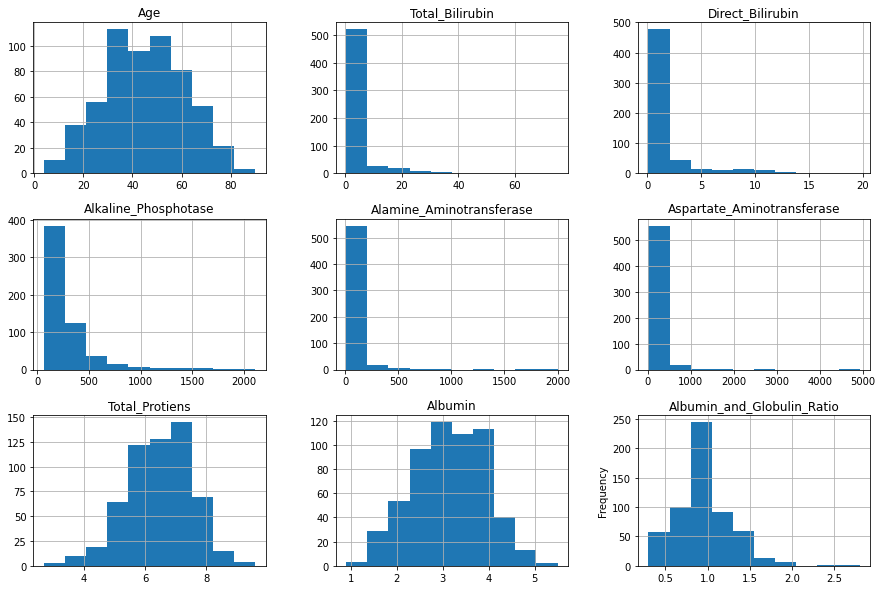

In [53]:
x.hist(figsize=(15,10))
plt.ylabel('Frequency')
plt.show()

In [10]:
import seaborn as sns
sns.catplot(x="Gender",col="Dataset", data=data, kind="count", height=5,aspect=.7)



NameError: name 'data' is not defined

In [49]:
sns.catplot(x="Age", col="Dataset", data=data, kind="count", height=10, aspect=2.0)


NameError: name 'sns' is not defined

In [50]:
sns.catplot (x="Total_Bilirubin",col="Dataset", data=data, kind="count", height=10, aspect=2.0)


NameError: name 'sns' is not defined

In [2]:
sns.catplot(x="Direct_Bilirubin",col="Dataset",data=data, kind="count", height=10, aspect=2.0)


NameError: name 'sns' is not defined

In [3]:
#sns.catplot(x="Dataset", col="Dataset", data=data, kind="count", height=5, aspect=.7)
plt.hist(y,label='Is not Patient=0\nIs Patient=1')
plt.xlabel("Patient or not")
plt.ylabel("Frequncy")
plt.title("Frequenct of Patients and Non-Patients")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [4]:
data['Gender'] = le.fit_transform(data['Gender'])
# female - 0, mate 1
x =data.drop('Dataset', axis=1)
y = data['Dataset']
from sklearn.preprocessing import MinMaxscaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

NameError: name 'le' is not defined

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=3444)

reg = LogisticRegression(solver='newton-cg')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) 

accuracy = metrics.accuracy_score(y_test, y_pred) 


NameError: name 'X' is not defined

In [6]:
data.corr()

NameError: name 'data' is not defined

In [7]:
import seaborn as sns

<AxesSubplot:>

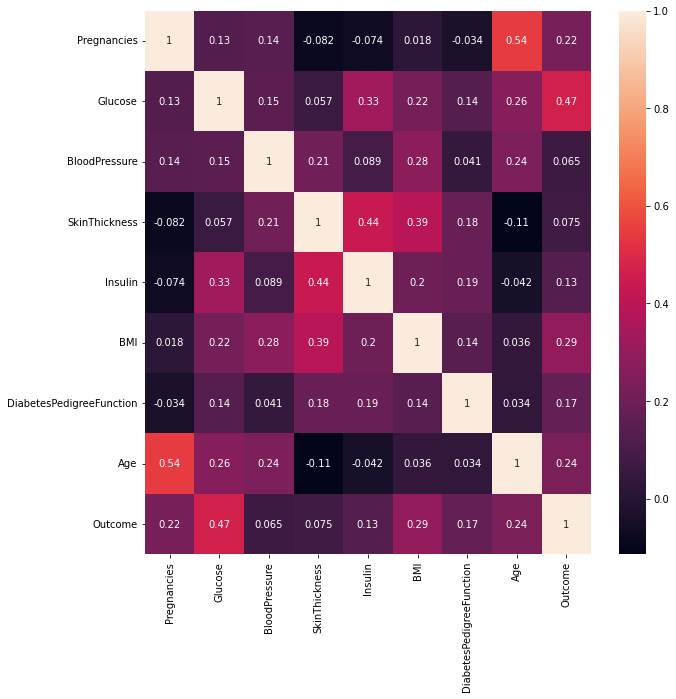

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

In [8]:
X = data.iloc[:,:-1]
Y = data['Outcome']

In [9]:
X.shape

(768, 8)

In [10]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/11, random_state = 242)

In [20]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (698, 8) (698,)
Test Set:  (70, 8) (70,)


In [14]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=20)
#model.fit(X_train, y_train)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [24]:
print(accuracy_score(y_test, model.predict(X_test))*100)
print(confusion_matrix(y_test, model.predict(X_test)))
print(f"Precision: {precision_score(y_test, model.predict(X_test))}")
print(f"Recall: {recall_score(y_test, model.predict(X_test))}")

90.0
[[46  3]
 [ 4 17]]
Precision: 0.85
Recall: 0.8095238095238095


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("../Model/diabetes.pkl",'wb'))

In [39]:
#input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = (1,85,66,29,0,26.6,0.351,31)

model = pickle.load(open("../Model/diabetes.pkl",'rb'))
values = np.asarray(input_data)
prediction = model.predict(values.reshape(1, -1))[0]

print(prediction)

if (prediction == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

0
The person is not diabetic


C:\Users\PAVEETHERAN\anaconda3\envs\AIPM\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
